## Analyzing the World Happiness Data

### Grouping together subsets of data via split-apply-combine

In this exercise, we will apply the split-apply-combine methodology to take advantage of substructure within the WHR panel data.

As before, we'll repeat here some of the code developed in previous exercises so that we can continue to work with data in this exercise. Execute the next few code cells to load and reconfigure the data. In addition to the full dataset, we will also want to examine the data just from 2015-2017, which we will store in a dataframe named `df1517`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [3]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df1517 = df[df.year.isin(range(2015,2018))]

### Step 1

First examine the head of the ```df``` dataframe to remind yourself of its structure.  Each row contains information about a single country in a single year.  We will want to group some of these data elements together.

In [4]:
df.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.72,0.52,0.26,7.17,0.45,49.21,0.72,0.18,0.88
1,Afghanistan,2009,4.40,0.58,0.24,7.33,0.55,49.62,0.68,0.20,0.85
2,Afghanistan,2010,4.76,0.62,0.28,7.39,0.54,50.01,0.60,0.14,0.71
3,Afghanistan,2011,3.83,0.61,0.27,7.42,0.52,50.37,0.50,0.18,0.73
4,Afghanistan,2012,3.78,0.71,0.27,7.52,0.52,50.71,0.53,0.25,0.78


### Step 2

In the previous video, we examined how to group data together for each country and compute an aggregrate property such as the mean over that group.  In the code cell below, enter and evaluate an expression to compute the mean value of the WHR indicators for each country, averaged over all years, and assign the result to the variable ```dfmean```.  To do this, you will want to use the ```groupby``` method on the ```df``` dataframe.  Examine ```dfmean``` to verify that it has the correct structure, which should consist of one row per country (unlike the raw data we examined above).

In [5]:
dfmean = df.groupby(['country']).mean()
print(dfmean)

               year  Happiness  Positive  Negative  LogGDP  Support  Life  \
country                                                                     
Afghanistan 2012.50       3.81      0.58      0.30    7.42     0.52 50.84   
Albania     2012.40       4.99      0.64      0.30    9.25     0.72 68.03   
Algeria     2013.33       5.56      0.62      0.27    9.50     0.80 64.98   
Angola      2012.50       4.42      0.61      0.35    8.71     0.74 51.73   
Argentina   2011.50       6.41      0.84      0.27    9.83     0.91 66.76   
...             ...        ...       ...       ...     ...      ...   ...   
Venezuela   2010.82       6.41      0.82      0.22    9.71     0.93 64.12   
Vietnam     2011.50       5.29      0.63      0.21    8.48     0.83 65.36   
Yemen       2012.40       3.97      0.54      0.30    8.19     0.72 54.06   
Zambia      2011.64       4.69      0.72      0.28    8.10     0.75 49.64   
Zimbabwe    2011.50       4.06      0.72      0.21    7.42     0.81 46.42   

### Step 3

Now let's look at variation over time.  In the code cell below, using the ```groupby``` method:

* Compute the mean value of all WHR indicators per year (over all countries), and assign the result to the variable ```mean_vals_by_year```
* Compute the minimum values of all WHR indicators per year (over all countries), and assign the result to the variable ```min_vals_by_year```
* Compute the maximum values of all WHR indicators per year (over all countries), and assign the result to the variable ```max_vals_by_year```

In [6]:
mean_vals_by_year = df.groupby(['year']).mean()
min_vals_by_year = df.groupby(['year']).min()
max_vals_by_year = df.groupby(['year']).max()

### Step 4

In the code cell below, enter and evaluate code to plot the min, mean, and max values of Happiness by year, using the dataframes computed in the cell above.  Plot all three curves in the same figure. You might want to consult the documentation on the [plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for pandas dataframes &mdash; in this case, we want simple line plots. You might also find [this tutorial](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html) and [this tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) helpful.

## Graded Cell

This cell is worth 50% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this (although the colors may be different depending on the order in which you plot each curve): <br><img src="GroupingKeysStep4.png" width=400 height=400  align="left"/>

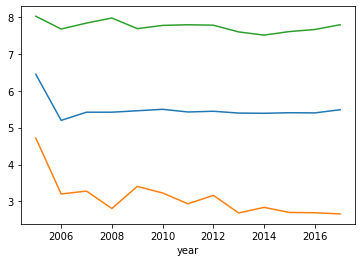

In [7]:
mean_vals_by_year.Happiness.plot()
min_vals_by_year.Happiness.plot()
max_vals_by_year.Happiness.plot()

### Step 5

The World Happiness Report introduces a hypothetical country named Dystopia, "so named because it has values equal to the world’s lowest national averages for 2015-2017 for each of the six key variables used in Table 2.1", where the six key variables are 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', and 'Corruption'.

Below, you will use the ```groupby``` method to compute the parameters associated with Dystopia, that is, the values of 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', and 'Corruption' associated with this hypothetical country, which is at the bottom of the heap for all indicators.

You'll need to do this in a few steps, because of the nature of the data.  Whereas 5 of the 6 key variables are generally positive attributes that one would want more of, the last &mdash; Perceptions of Corruption &mdash; is a negative attribute.  So while Dystopia is associated with the world's *lowest* national averages for the first 5 of the key variables, it is associated with the world's *highest* national average for the last variable.

In the code cell below:

* Compute the mean values of all WHR indicators by country over the 2015-2017 time frame, and then compute the lowest national averages over all countries.  Assign this result to the variable ```min_avg_vals```.
* Compute the mean values of all WHR indicators by country over the 2015-2017 time frame, and then compute the highest national averages over all countries.  Assign this result to the variable ```max_avg_vals```.
* Assign to the variable ```explanatory_vars``` a list of the six key variable names.

* You'll want to create a variable named ```Dystopia``` that contains the data in ```min_avg_vals``` for the first 5 of the explanatory variables, and the data in ```max_avg_vals``` for the last variable.  There are a couple different ways to do this, but we'll just carry out one of them here.
* Make a copy of the ```min_avg_vals``` (using the ```copy``` method on that Series), extract out just the columns associated with the explanatory variables from that copy, and assign the result to the variable ```Dystopia```.  The Series ```Dystopia``` should now have all the same values as the data in ```min_avg_vals```, but since we made a copy, we can now modify one of the entries in ```Dystopia``` without changing the data in ```min_avg_vals``` as well.
* Now overwrite the ```Corruption``` entry in ```Dystopia``` by assigning it to the corresponding value from ```max_avg_vals```.
* Print out the value of Dystopia.

## Graded Cell

This cell is worth 50% of the grade for this assignment.

In [8]:
min_avg_vals = df1517.groupby(['country']).mean().min()
max_avg_vals = df1517.groupby(['country']).mean().max()
explanatory_vars = ['LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption']
Dystopia = min_avg_vals.copy()
Dystopia.Corruption = max_avg_vals.Corruption
Dystopia = Dystopia[explanatory_vars]

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [9]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testDystopia

try:
    print(testDystopia(df1517, Dystopia, min_avg_vals, max_avg_vals, explanatory_vars))
except Exception as e:
    print("Error!\n" + str(e))

Correct!


### Step 6

Examine the contents of ```Dystopia```, and compare it with the Dystopia column in Table 19 of WHR Appendix 1, included below.  You should detect some slight discrepancies, for example in the LogGDP, Support, and Freedom entries.  This suggests that the WHR authors might have done some additional data cleaning that we have not performed here, and which is not immediately obvious from their textual description of the data pipeline:

<img src="groupingKeysAppendix.png" width=600 height=600 />

### Concluding thoughts

The World Happiness Report introduces the concept of Dystopia in part so that they can seek to explain the contributions of each of the explanatory variables to the overall level of Happiness in each country.  By making Dystopia a place that is at least no better than any actual country, they can perform a multivariate linear regression where each regression coefficient is positive.  One can go through the exercise of creating a modified dataframe that subtracts off the baseline values found in Dystopia, and then carries out an OLS regression to identify the contributions to Happiness of each of the key variables.  This is a worthwhile exercise if you are interested, but in doing so, you will probably find some quantitative discrepancies with what is created in the report, similar to the results in our Dystopia calculation.  The data tables included with the WHR include the *results* of their computations, but not the code used to carry out the computations themselves, so one is left with working to decipher what they might have done based on the textual description of their workflow.  

Of course, this state of affairs is not peculiar to the World Happiness Report.  Many scientific papers contain descriptions of methods or models, and then present the results of subsequent analyses that are sometimes hard to verify by working through the textual description.  There is increasing interest in providing reproducible computational workflows alongside descriptions of analyses, and one of the roles that Jupyter notebooks can play is to support the construction of computable documents that contain both code and the subsequent results. 